In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 14

In [4]:
# === 1. データ読み込み ===
# CSV ファイルをまとめて保存している場合は、そのパスを指定
file_csv = "../logs/result_20251201162005.csv"
basename_without_ext = os.path.splitext(os.path.basename(file_csv))[0]
df = pd.read_csv(file_csv)
df

,file,code,trade,PERIOD_MA_1,PERIOD_MA_2,PERIOD_MR,THRESHOLD_MR,total
0,ticks_20251127.xlsx,7011,100,30,300,15,1,-37.0
1,ticks_20251128.xlsx,7011,100,30,300,15,1,17.0
2,ticks_20251201.xlsx,7011,100,30,300,15,1,47.0
3,ticks_20251127.xlsx,7011,100,60,300,15,1,-68.0
4,ticks_20251128.xlsx,7011,100,60,300,15,1,-52.0
...,...,...,...,...,...,...,...,...
238,ticks_20251128.xlsx,7011,16,60,900,45,7,-3.0
239,ticks_20251201.xlsx,7011,14,60,900,45,7,20.0
240,ticks_20251127.xlsx,7011,10,90,900,45,7,-16.0
241,ticks_20251128.xlsx,7011,14,90,900,45,7,-18.0


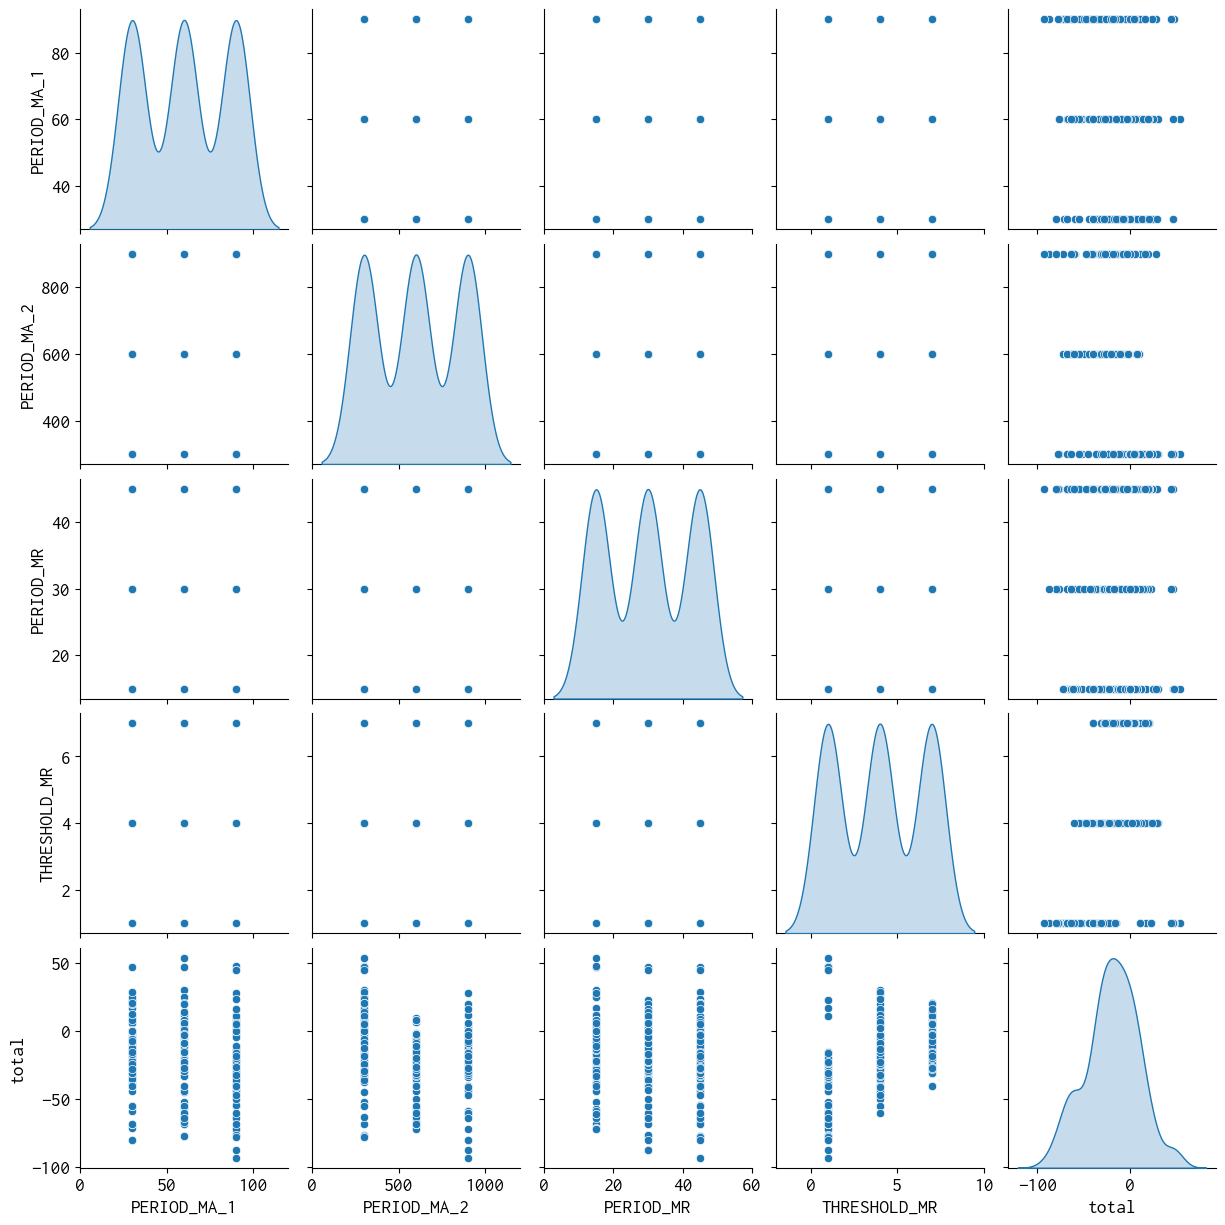

In [5]:
# === 2. 因子と応答の関係を可視化 ===
# fig, ax = plt.subplots(figsize=(6, 6))
pp = sns.pairplot(
    df[["PERIOD_MA_1", "PERIOD_MA_2", "PERIOD_MR", "THRESHOLD_MR", "total"]],
    diag_kind="kde",
)
"""
for ax in pp.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
"""
plt.savefig(os.path.join("..", "logs", f"{basename_without_ext}_1.png"))
plt.show()

In [6]:
# === 3. 分散分析 (ANOVA) ===
# 4因子の主効果と交互作用を含めたモデル
model = ols(
    "total ~ C(PERIOD_MA_1) * C(PERIOD_MA_2) * C(PERIOD_MR) * C(THRESHOLD_MR)", data=df
).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
# pd.options.display.max_colwidth = 100
print(anova_table)

                                                           sum_sq     df  \
C(PERIOD_MA_1)                                         304.617284    2.0   
C(PERIOD_MA_2)                                       21292.617284    2.0   
C(PERIOD_MR)                                          4732.518519    2.0   
C(THRESHOLD_MR)                                      39428.222222    2.0   
C(PERIOD_MA_1):C(PERIOD_MA_2)                          743.876543    4.0   
C(PERIOD_MA_1):C(PERIOD_MR)                            175.382716    4.0   
C(PERIOD_MA_2):C(PERIOD_MR)                            199.456790    4.0   
C(PERIOD_MA_1):C(THRESHOLD_MR)                        2123.679012    4.0   
C(PERIOD_MA_2):C(THRESHOLD_MR)                        8850.641975    4.0   
C(PERIOD_MR):C(THRESHOLD_MR)                          1484.444444    4.0   
C(PERIOD_MA_1):C(PERIOD_MA_2):C(PERIOD_MR)             697.382716    8.0   
C(PERIOD_MA_1):C(PERIOD_MA_2):C(THRESHOLD_MR)         2159.530864    8.0   
C(PERIOD_MA_

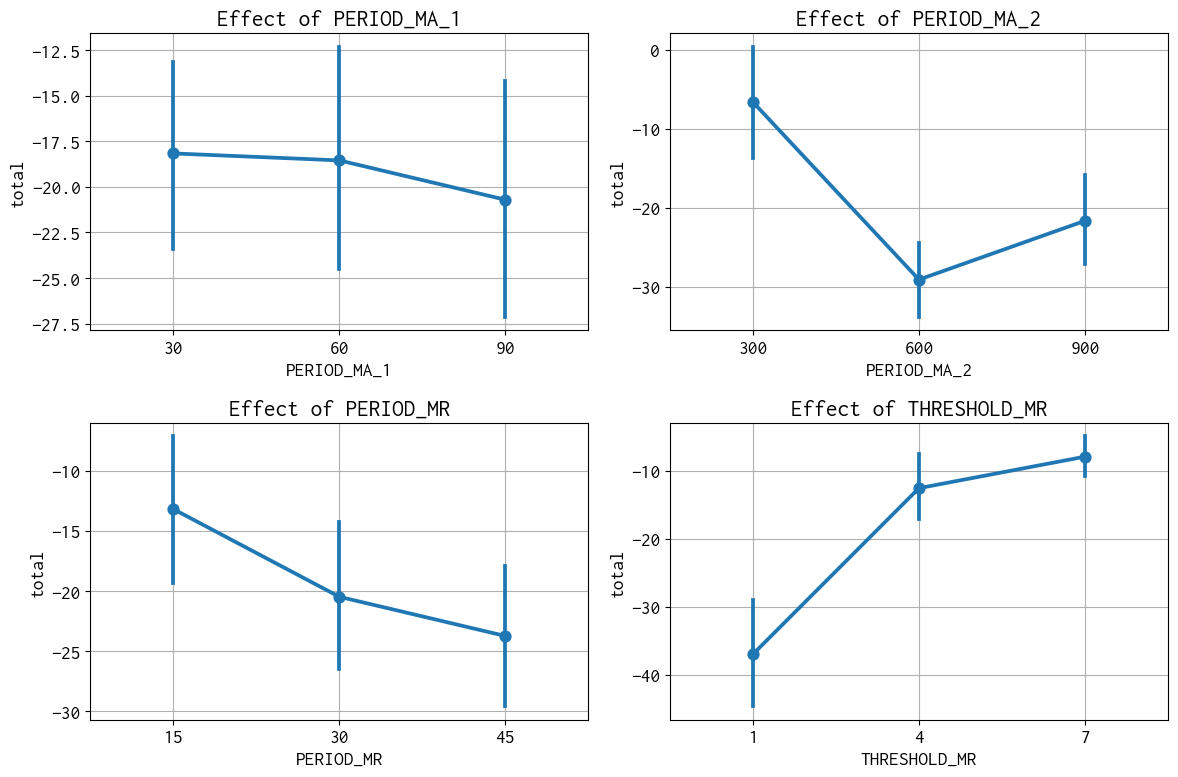

In [7]:
# === 4. 各因子の平均効果を可視化 ===
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(
    axes.flatten(), ["PERIOD_MA_1", "PERIOD_MA_2", "PERIOD_MR", "THRESHOLD_MR"]
):
    # sns.pointplot(x=col, y="total", data=df, ax=ax, errorbar=None)
    sns.pointplot(x=col, y="total", data=df, ax=ax)
    ax.set_title(f"Effect of {col}")
    ax.grid()
plt.tight_layout()
plt.savefig(os.path.join("..", "logs", f"{basename_without_ext}_2.png"))
plt.show()